### Predicting HOF induction of quarterbacks on first 60 games played

In [1]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime
pd.set_option('display.max_columns', None)


In [2]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Data Imports

In [3]:
###This dF has players stats and Player ID
#Player data on the game level
#https://www.kaggle.com/zynicide/nfl-football-player-stats?select=games_1512362753.8735218.json
data_path = ('/home/thomas/attempt at build week for unit 2/games_1512362753.8735218.json')
df_stats = pd.read_json(data_path)

### This df has player names with ID
#https://www.kaggle.com/zynicide/nfl-football-player-stats?select=games_1512362753.8735218.json
data_path_2 = ('/home/thomas/attempt at build week for unit 2/profiles_1512362725.022629.json')
df_HOF_feature = pd.read_json(data_path_2)

###This df has player name with HOF Status
#URL = https://www.pro-football-reference.com/hof/index.htm#all_hof_players
data_path_3 = ('/home/thomas/attempt at build week for unit 2/Hall_of_Fame_Individuals.csv')
df_HOF_players = pd.read_csv(data_path_3)

In [4]:
#Setting first row as headers
headers = df_HOF_players.iloc[0]
df_HOF_players.columns = headers

#dropping the first row because they are my headers which have been set to .columns
df_HOF_players.drop([0], inplace=True)
#df_HOF_players.head()

### Merging imports to generate a df with all the information required

In [5]:
#Merging HOF Status and player names on player names with ID. 
#Non technical terms- fitting two of the puzzle pieces together
df_first_merge = pd.merge(left=df_HOF_feature, right=df_HOF_players, left_on='name', right_on='Player', how= 'left')

#This is the (first merge df) on top of df_stats for a grand total of all the features.
df_second_merge = pd.merge(left=df_stats, right=df_first_merge, left_on='player_id', right_on='player_id', how='left')

#Checking for a correct merge of df and second merge. The len of df_stats and df aka 'df_second_merge'
#should be the same to make sure none of the rows are being cut off
print(len(df_second_merge))
print(len(df_stats))

df = df_second_merge
###Copy of df for filtering player id to recieve name in my predictions
df_player_check1 = df.copy()

1024164
1024164


In [6]:
#Filtering positions to only take QB's
df = df[df['position'] == 'QB'].reset_index(drop=True)
len(df)

39316

In [7]:
###Next step is a descision on grouping by career stats or by a single YR stats
#If I choose rookie stats, this is not perfect because rookies can have a bad year and have not had a lot of time to cappilize on the transition from a collegiate career to a professional status. Also, rookies can ride the bench the whole season which would not give them any quality stats. On the contrary, they could out perform on a yearly level compared to their upcoming years.
#If I choose career stats, not everyone in the league has had many seasons under their belt. This would produce terrible predictions on the likelyhood of a rookie or a palyer with few seasons on their induction to the HOF.

##I chose first 60 games

In [8]:
##data goes to 2017 season
df['year'].max()

2017

### Splitting data by Eligibility and 60 game Minimum

In [9]:
##This function fliters the df for each indivual player_id that has 60 games recorded, so we can throw out obvious non contenders of the HOF status.
#also breaks the main df into elgible players and non elgible, and Elgible players have been retired from the league for 5 years.
#This function will ensure everyone has a constant of 60 games. 

#beaks into elgible(5 yr. condition) and unelgible(not 5 yr condition)
#Takes first 60 records of unique player id
#yrs played as well
# player_list = df['player_id'].unique()

def eligibility_check(df):
    eligible_players = []
    non_eligible_dfs = []
    eligibility_year = (df['year'].max() - 5)
    print('eligibility year:', eligibility_year)
    for player_id in df['player_id'].unique():
        new_df = df[df['player_id'] == player_id]
        new_df['Yrs_played'] = new_df['year'].nunique()
        if len(new_df)< 60:
            print (player_id, ' removed----', 'Games played: ', len(new_df))
            #pass
        elif new_df['year'].max() > eligibility_year:
            non_eligible_df = new_df.head(60)
            non_eligible_dfs.append(non_eligible_df)
        else: 
            player_first_60 = new_df.head(60)
           # print(player_first_60)
            eligible_players.append(player_first_60)

    all_eligible_df = pd.concat(eligible_players)
    all_non_eligible_df = pd.concat(non_eligible_dfs)
    all_eligible_df.reset_index(drop=True, inplace=True)
    all_non_eligible_df.reset_index(drop=True, inplace=True)
    output_dict = {'eligible': all_eligible_df, 'non_eligible_df': all_non_eligible_df}
    return output_dict






In [10]:
###Calling function to make Eligible and non Elgible player DF's
eligible_df = eligibility_check(df)['eligible']

non_eligible_df = eligibility_check(df)['non_eligible_df']

ved---- Games played:  47
17509  removed---- Games played:  6
13284  removed---- Games played:  12
10371  removed---- Games played:  1
1886  removed---- Games played:  1
23593  removed---- Games played:  7
15251  removed---- Games played:  7
8197  removed---- Games played:  30
20023  removed---- Games played:  1
15254  removed---- Games played:  1
2226  removed---- Games played:  2
24715  removed---- Games played:  34
7893  removed---- Games played:  21
24537  removed---- Games played:  5
19884  removed---- Games played:  1
3948  removed---- Games played:  1
2560  removed---- Games played:  26
14490  removed---- Games played:  10
5432  removed---- Games played:  5
3857  removed---- Games played:  1
13813  removed---- Games played:  7
23285  removed---- Games played:  7
22826  removed---- Games played:  4
3911  removed---- Games played:  8
20865  removed---- Games played:  2
17024  removed---- Games played:  5
21907  removed---- Games played:  8
18464  removed---- Games played:  2
14022

### Data Wrangling

In [11]:
#How to wrangle a wrangler lol
def wrangle(df):

  # Drop uninformative columns
  df.drop(columns=['hof_induction_year', 'Rk', 'Player', 'Pos', 'From', 'To', 'AP1', 'PB', 'St', 'CarAV', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Lng', 'Int', 'Sk', 'Yds', 'Att', 'Yds', 'TD',	'Lng', 'Rec', 'Yds', 'TD', 'Lng', 'current_salary', 'draft_position', 'game_number', 'player_team_score',	'opponent_score'], inplace=True)

  # Drop repeat rows (observations)
  df.drop_duplicates(inplace=True)

  # Drop repeat columns (features)
  df.drop(columns=['current_team', 'date', 'passing_sacks', 'passing_sacks_yards_lost'], inplace=True)

  #Correcting a data collection issue. 
  actually_these_are_completions = df['passing_attempts'] 
  actually_these_are_attempts = df['passing_completions']

  df['passing_attempts'] = actually_these_are_attempts
  df['passing_completions'] = actually_these_are_completions

  #manually droping features with lots of NaN
  df.drop(columns=['draft_team', 'birth_place', 'death_date'], inplace=True)
  #Not sure if I should take out draft team or draft round because 80% of the data remains in each feature

  #Removing features that would not represent a QB
  df.drop(columns=['position', 'receiving_targets', 'receiving_receptions', 'receiving_yards', 'receiving_touchdowns', 'kick_return_attempts', 'kick_return_yards', 'kick_return_touchdowns', 'punt_return_attempts', 'punt_return_yards', 'punt_return_touchdowns', 'defense_sacks', 'defense_tackles', 'defense_tackle_assists', 'defense_interceptions', 'defense_interception_yards',	'defense_interception_touchdowns', 'defense_safeties', 'point_after_attemps', 'point_after_makes', 'field_goal_attempts', 'field_goal_makes', 'punting_attempts', 'punting_yards', 'punting_blocked'], inplace=True)

  #manually dropping features with high-cardinality
  df.drop(columns=['high_school', 'college','birth_date', 'height', 'name', 'age', 'game_location', 'team', 'opponent', 'draft_year'], inplace=True)

  return df


# CLEAN DATASET WITH WRANGLE FUNCTION
#df = wrangle(df)
eligible_df = wrangle(eligible_df)
non_eligible_df = wrangle(non_eligible_df)

### Creating Target Feature For Classification Problem

In [12]:
# feature engineering
  #Creating a categorical Target feature for classification of (HAll OF FAMER:1 or PeeWee Player:0) to represent (INDCT YR's and the NAN's/non HOF). 
  #This sets up for feature modeling
def HOF(df, colname):
    Indct = []
    for i in df[colname]:
        if i is np.nan:
            Indct.append('0')
        else: Indct.append('1')
    return Indct

#taking my new list from HOF func and setting it to replace / (=) to the col name in the df. 
eligible_df['Indct'] = HOF(eligible_df, 'Indct')
non_eligible_df['Indct'] = HOF(non_eligible_df, 'Indct')

### Checking for HOF Induction to be represented in data

In [13]:
#Checking data collection for the correct number of HOF that have been inducted already

### Not the true number of Hall of famers because this counts induction for the individual by adding all the nan values from 'Indct'. This is not the true number because every instance a player is a HOF it will be counted for every game they were in the league. So I can assume, since there are 346 HOF, the average career games for a HOF player is (97.14) . This metric can be checked by taking every instance of HOF / tot of 'true' HOF since the league started.
print(df['Indct'].value_counts())
print(len(df) - (df['Indct'].isnull().sum()), 'instances of HOF in the df(not true number)')
print(33611/346, 'avg HOF games played')
print('Checking that every HOFer has been accounted for', 97.14*346, '=', '33611')

2005    451
2006    399
1981    300
1985    294
2004    256
1986    254
2000    215
1987    199
1983    194
1993    188
1989    187
1977    184
1971    182
2002    177
1990    173
1967    159
2017    138
1965     39
Name: Indct, dtype: int64
3989 instances of HOF in the df(not true number)
97.14161849710983 avg HOF games played
Checking that every HOFer has been accounted for 33610.44 = 33611


### Creating a tabular data to prepare for predictive modeling with machine learning

In [14]:
#Creating a tabular data set of players statistics by aggregation of games for year and normalilize across all players stats that year. Then agg the totals for years in the players first 60 games.
def aggregate_and_normalize(input_df, features_to_normalize):
    normalized_player_dfs = []
    by_year = input_df.groupby(by='year').agg('mean').reset_index()
    by_year.drop('player_id', axis=1, inplace=True)
    for player in input_df['player_id'].unique():
        #This is where rushing touchdowns for inellgible df breaks by agg the mean for the year print(by_year)
        normalized_player_yr_dfs = []
        player_df = input_df[input_df['player_id'] == player].reset_index(drop=True)
        induction_status = player_df['Indct']
        yrs_played = player_df['Yrs_played'].unique()[0]
        win_pct = (player_df['game_won'].value_counts()[True] / len(player_df))
        player_df.drop('Yrs_played', axis=1, inplace=True)
        draft_rounds = player_df['draft_round']
        player_df.drop('draft_round', axis=1, inplace=True)
        player_df.drop('game_won', axis=1, inplace=True)
        player_by_year = player_df.groupby(by='year').agg('mean').reset_index()
        for year in player_by_year['year'].unique():
            player_by_year = player_by_year[features_to_normalize]
            standardization_df = by_year[features_to_normalize]
            normalized_year = player_by_year / standardization_df
            normalized_year['player_id'] = player
            normalized_year['Indct'] = induction_status
            normalized_player_yr_dfs.append(normalized_year)
        p_Df = pd.concat(normalized_player_yr_dfs)
        player_final = p_Df.groupby('player_id').agg('mean').reset_index()
        player_final['Indct'] = induction_status
        player_final['Yrs_played'] = yrs_played
        player_final['draft_round'] = draft_rounds
        player_final['win_pct'] = win_pct
        normalized_player_dfs.append(player_final)
    all_final = pd.concat(normalized_player_dfs).reset_index(drop=True)
    return all_final

In [15]:
#calling func to aggregate and normalize by year
eligible_df_final = aggregate_and_normalize(eligible_df, ['passing_yards', 'passing_touchdowns', 'passing_attempts', 'passing_completions', 'passing_rating', 'passing_interceptions', 'rushing_attempts', 'rushing_yards', 'rushing_touchdowns'])

non_eligible_df_final = aggregate_and_normalize(non_eligible_df, ['passing_yards', 'passing_touchdowns', 'passing_attempts', 'passing_completions', 'passing_rating', 'passing_interceptions', 'rushing_attempts', 'rushing_yards', 'rushing_touchdowns'])

### Feature Engineering for Draft Round and dealing with Multi-Collinearity Features

In [16]:
#missing draft round emplies the player went undrafted. The way I accounted for undrafted players to be represented in the data is filling the NaN's with 8 since there are only 7 draft rounds
eligible_df_final['draft_round'] = eligible_df_final['draft_round'].fillna('8')
non_eligible_df_final['draft_round'] = non_eligible_df_final['draft_round'].fillna('8')

#Changing draft_round to int
eligible_df_final['draft_round'] = eligible_df_final['draft_round'].astype(int)
non_eligible_df_final['draft_round'] = non_eligible_df_final['draft_round'].astype(int)

#droping high correlation features that will not affect the models acc drastically because the model can understand the same information from another feature. This will create a little bit more insight for feaure importamce to have a better understanding in permutation importances plots
eligible_df_final.drop(columns= ['passing_attempts', 'passing_completions', 'rushing_touchdowns'], inplace=True)
non_eligible_df_final.drop(columns= ['passing_attempts', 'passing_completions', 'rushing_touchdowns'], inplace=True)

### Split -> Train -> Test on Elgible Players

In [17]:
#Assigning Target Feature 
from sklearn.model_selection import train_test_split

target = 'Indct'
y = eligible_df_final[target]
X = eligible_df_final.drop(columns=[target, 'player_id'])

In [18]:
#Showing correlation in my features to have a better understanding of the predictive modeling with my features 
X.corr()

,passing_yards,passing_touchdowns,passing_rating,passing_interceptions,rushing_attempts,rushing_yards,Yrs_played,draft_round,win_pct
passing_yards,1.000000,0.882296,0.843237,0.577675,0.414461,0.224409,0.218734,-0.126316,-0.050228
passing_touchdowns,0.882296,1.000000,0.829510,0.587492,0.372916,0.206665,0.297367,-0.095820,0.073380
passing_rating,0.843237,0.829510,1.000000,0.436756,0.425613,0.266094,0.281796,-0.109433,0.029092
passing_interceptions,0.577675,0.587492,0.436756,1.000000,0.274946,0.189571,0.230628,-0.122534,-0.329597
rushing_attempts,0.414461,0.372916,0.425613,0.274946,1.000000,0.926620,0.159423,-0.215048,-0.034373
rushing_yards,0.224409,0.206665,0.266094,0.189571,0.926620,1.000000,0.158345,-0.203864,-0.052592
Yrs_played,0.218734,0.297367,0.281796,0.230628,0.159423,0.158345,1.000000,-0.063578,0.047542
draft_round,-0.126316,-0.095820,-0.109433,-0.122534,-0.215048,-0.203864,-0.063578,1.000000,0.216757
win_pct,-0.050228,0.073380,0.029092,-0.329597,-0.034373,-0.052592,0.047542,0.216757,1.000000


In [19]:
#Make sure to strattify in test train split for a small and imbalanced dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [20]:
# Imports from SkLearn.Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Building Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

log_model = LogisticRegression()


log_model.fit(X_train, y_train);

In [22]:
#Model ACC
print('LOG: Training Accuracy Score:', log_model.score(X_train, y_train))
print('LOG: Validation Accuracy Score:', log_model.score(X_val, y_val))

LOG: Training Accuracy Score: 0.8974358974358975
LOG: Validation Accuracy Score: 0.8717948717948718


### Classification Report For Log Model

In [23]:
from sklearn.metrics import classification_report
# YOUR CODE HERE
classification_log_model = classification_report(y_val,
                      log_model.predict(X_val),
                      target_names=['1', '0'])

print(classification_log_model)

              precision    recall  f1-score   support

           1       0.89      0.97      0.93        35
           0       0.00      0.00      0.00         4

    accuracy                           0.87        39
   macro avg       0.45      0.49      0.47        39
weighted avg       0.80      0.87      0.84        39



### Permutation Importance for LOG Model

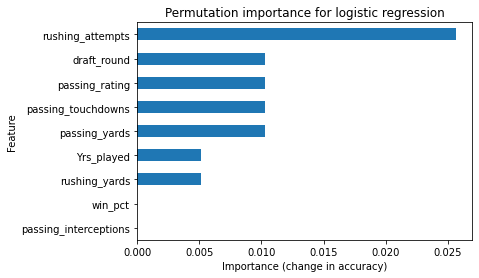

In [24]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(log_model, X_val, y_val, n_jobs=-1, random_state=42)

data = {'mean_importance' : perm_imp['importances_mean'], 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=True, inplace=True)

df['mean_importance'].plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for logistic regression');

### Building Random Forrest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators= 1000, max_depth= 10))

forest_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=1000))])

In [26]:
#Checking model acc
print('FOREST: Training Accuracy:', forest_model.score(X_train, y_train))
print('FOREST: VAl Accuracy:', forest_model.score(X_val, y_val))

FOREST: Training Accuracy: 1.0
FOREST: VAl Accuracy: 0.8717948717948718


### Classifitcation Report for Random Forest Model

In [27]:
classification_forest_model = classification_report(y_val,
                      forest_model.predict(X_val),
                      target_names=['1', '0'])

print(classification_log_model)

              precision    recall  f1-score   support

           1       0.89      0.97      0.93        35
           0       0.00      0.00      0.00         4

    accuracy                           0.87        39
   macro avg       0.45      0.49      0.47        39
weighted avg       0.80      0.87      0.84        39



### Permutation Importance For Random Forest Model

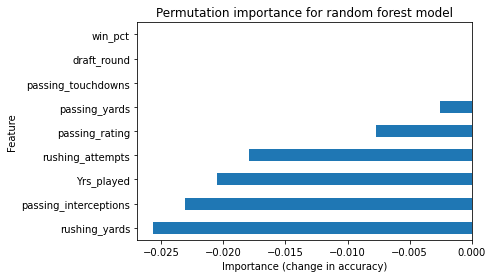

In [28]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(forest_model, X_val, y_val, n_jobs=-1, random_state=42, n_repeats=10)

data = {'mean_importance' : perm_imp['importances_mean'],
 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=True, inplace=True)

df['mean_importance'].plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for random forest model');

### Building XGBoost Model

In [29]:
from xgboost import XGBClassifier
boost_model = make_pipeline(
    StandardScaler(),
    XGBClassifier(n_jobs=-1, random_state=42, n_estimators= 200, max_depth= 1, eta= 0.01, colsample_bytree= 0.6))

boost_model.fit(X_train, y_train);

[12:40:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
#Model acc 
print('BOOST: Training accuracy:', boost_model.score(X_train, y_train))
print('BOOST: Val accuracy:', boost_model.score(X_val, y_val))

BOOST: Training accuracy: 0.8974358974358975
BOOST: Val accuracy: 0.8974358974358975


### Classification Report for XGB Model

In [31]:
classification_boost_model = classification_report(y_val,
                      boost_model.predict(X_val),
                      target_names=['1', '0'])

print(classification_log_model)

              precision    recall  f1-score   support

           1       0.89      0.97      0.93        35
           0       0.00      0.00      0.00         4

    accuracy                           0.87        39
   macro avg       0.45      0.49      0.47        39
weighted avg       0.80      0.87      0.84        39



### Permutation Importance for XGBoost Model

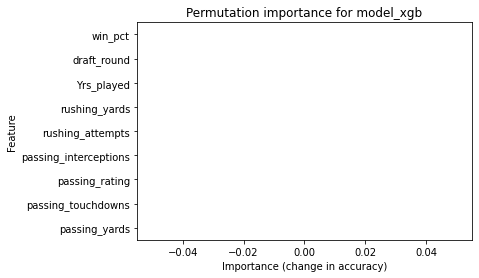

In [32]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(boost_model, X_val, y_val, n_jobs=-1, random_state=42)

data = {'mean_importance' : perm_imp['importances_mean'], 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=False, inplace=True)
df.head()
df['mean_importance'].plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for model_xgb');

ROC-Curve for Log Model, Forrest Model, and XGBoost Model

Text(0.5, 1.0, 'XGBoost')

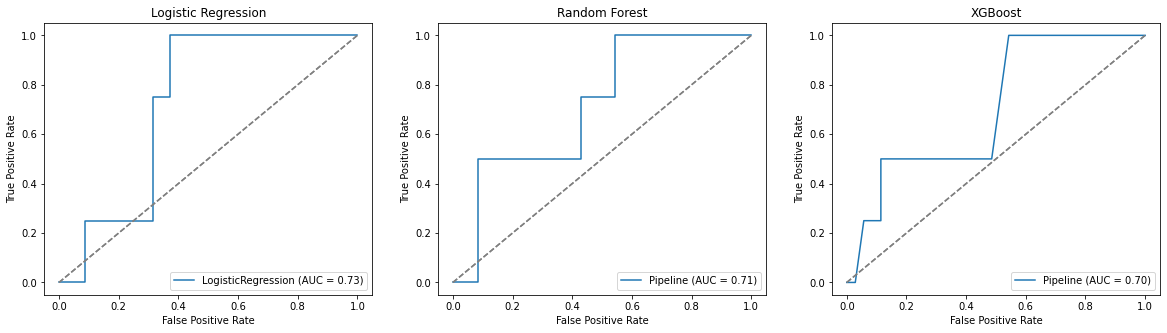

In [33]:
from sklearn.metrics import plot_roc_curve

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,5))

plot_roc_curve(log_model, X_val, y_val, ax=ax1)
plot_roc_curve(forest_model, X_val, y_val, ax=ax2)
plot_roc_curve(boost_model, X_val, y_val, ax=ax3)

ax1.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax2.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax3.plot([(0,0), (1,1)], color='grey', linestyle='--')


ax1.set_title('Logistic Regression')
ax2.set_title('Random Forest')
ax3.set_title('XGBoost')

In [34]:
### Generating Predicitions With Logistic 

In [35]:
###setting up for predictions on non Elgible players df
non_eligible_identifiers = non_eligible_df_final[[target, 'player_id']]
non_eligible_df_final.drop(columns=[target, 'player_id'], inplace=True)

#predicting induction and the proba for prediction
non_eligible_predictions = log_model.predict(X=non_eligible_df_final)
non_eligible_prediction_probs = log_model.predict_proba(X=non_eligible_df_final)

In [36]:
#Predictions
non_eligible_predictions

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0'],
      dtype=object)

In [37]:

non_eligible_identifiers['predictions'] = non_eligible_predictions
hof_prob = []
for prob_pair in non_eligible_prediction_probs:
    hof_prob.append(prob_pair[1])

non_eligible_identifiers['HoF_probability'] = hof_prob

In [38]:
###creating Df of final predictions
likely_HoF = non_eligible_identifiers[non_eligible_identifiers['predictions'] == '1'].reset_index(drop=True)

### Final Predictions for future HOF QB's

In [39]:
likely_HoF

,Indct,player_id,predictions,HoF_probability
0,0,22931,1,0.720134
1,0,13985,1,0.725465
2,0,16363,1,0.600047


In [40]:
for player_id in likely_HoF['player_id']:
    name = df_player_check1[df_player_check1['player_id'] == player_id]['name'].reset_index(drop=True)[0]
    print('Likely future Hall of Famer:', name)

Likely future Hall of Famer: Michael Vick
Likely future Hall of Famer: Peyton Manning
Likely future Hall of Famer: Cam Newton
